In [73]:
import numpy as np
import pandas as pd
import itertools 
import re
from scipy.integrate import odeint
import pylab as pl
import matplotlib.pyplot as plt
import random
from statistics import mean 
import math
import datetime
path_file="https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
dataset=pd.read_csv(path_file,parse_dates=['data'])
data=dataset[['totale_positivi','dimessi_guariti','deceduti']]
data_first=pd.read_csv(path_file)['data'][0][:-9]
data_last=pd.read_csv(path_file)['data'][data.shape[0]-1][:-9]

In [2]:
def deriv(y,t,k1,k2,k3):  
    '''set di equazioni differenziali'''
  
    Sani            =   y[0]
    Infetti         =   y[1]
   
    Morti           =   y[2]
    Guariti         =   y[3]
    
    dSanidt =  -k1*Sani*Infetti 
    dInfettidt = k1*Sani*Infetti-k2*Infetti-k3*Infetti
 
    dMortidt=k2*Infetti
    dGuaritidt =k3*Infetti
    
    return [dSanidt,dInfettidt,dMortidt,dGuaritidt]

In [3]:
def diffusione(parameters,Sani =60359779, Infetti=221,Guariti=1, Morti= 7,orizzonte_temporale_in_gg=data.shape[0]):
        y0 =  (Sani,Infetti,Guariti,Morti)
        t = np.arange(0,orizzonte_temporale_in_gg)
        ret = odeint(deriv, y0, t,args=tuple(parameters))
        return(ret)

In [74]:
dat=generateRandomPopulation((50,3),0,1)

In [75]:
df=fitness(dat,10)

In [76]:
df

,num,mean
0,"[0.6266422776313088, 0.6101705258370572, 0.970...",1.579809e-15
1,"[0.891396675422071, 0.42793642470767124, 0.797...",1.512669e-15
2,"[0.512756437414954, 0.8835516892172527, 0.5654...",1.581591e-15
3,"[0.9695590422550349, 0.7210578942130045, 0.682...",1.654391e-15
4,"[0.5930948810183405, 0.5356442112014369, 0.617...",1.634691e-15
5,"[0.6099784957985483, 0.6759065420016667, 0.348...",1.484385e-15
6,"[0.029173778382723503, 0.7314977685453573, 0.2...",1.284589e-15
7,"[0.5710520328045466, 0.659957008982715, 0.8091...",1.641315e-15
8,"[0.1935152443506325, 0.1723125267841914, 0.058...",1.081029e-15
9,"[0.7345755408859749, 0.2431530427111902, 0.329...",1.511439e-15


In [77]:
df2 = df.sort_values('mean', ascending=False)

In [78]:
df2

,num,mean
36,"[0.3159018319244705, 0.8888503327097803, 0.900...",1.664900e-15
17,"[0.9418738209369109, 0.944095217279704, 0.8766...",1.663067e-15
35,"[0.11784327676404516, 0.7942843068812473, 0.81...",1.661437e-15
40,"[0.8277606117684624, 0.7426835419895802, 0.796...",1.658017e-15
27,"[0.411002994009641, 0.839320706738475, 0.96370...",1.657403e-15
19,"[0.6247042770430443, 0.7991092277952371, 0.914...",1.656436e-15
3,"[0.9695590422550349, 0.7210578942130045, 0.682...",1.654391e-15
49,"[0.7490936235382448, 0.9650569407071568, 0.777...",1.645032e-15
42,"[0.6976617954360675, 0.6663816065994452, 0.593...",1.643603e-15
7,"[0.5710520328045466, 0.659957008982715, 0.8091...",1.641315e-15


In [80]:
 list(df2['num'][:10])

[array([0.31590183, 0.88885033, 0.9000482 ]),
 array([0.94187382, 0.94409522, 0.8766366 ]),
 array([0.11784328, 0.79428431, 0.81142725]),
 array([0.82776061, 0.74268354, 0.7962071 ]),
 array([0.41100299, 0.83932071, 0.96370662]),
 array([0.62470428, 0.79910923, 0.91409424]),
 array([0.96955904, 0.72105789, 0.68279511]),
 array([0.74909362, 0.96505694, 0.77707531]),
 array([0.6976618 , 0.66638161, 0.59320975]),
 array([0.57105203, 0.65995701, 0.80910337])]

In [4]:
def fitness(lista,valore): 
    dfObj = pd.DataFrame(columns=['num', 'mean'])
    for num2 in lista:
        previsti=diffusione(num2)
        df=pd.DataFrame(previsti,columns=['sani','totale_positivi','deceduti','dimessi_guariti'])
        df=df.drop(columns=['sani'])
        dataframe=((df-data)**2)
        lista=dataframe.values.tolist()
        merged = list(itertools.chain.from_iterable(lista))
        
       
        for el in range(5,len(merged),3): #24 se usare solo lati
            merged[el]=merged[el]*valore
        #for el in range(125,len(merged),3):
         #   merged[el]=merged[el]*valore
        
        media=1/mean(merged)
        dfObj = dfObj.append({'num': num2, 'mean': media}, ignore_index=True)
        
    return dfObj

In [5]:
def generateRandomPopulation(popsize, exp_min, exp_max):               #genero k iniziali 
    pop_init = np.random.uniform(low=exp_min, high=exp_max, size=popsize)
    return(list(pop_init))

In [6]:
def rouletteSelection(DF):
    return(np.random.choice(DF['num'], size=2, replace=False, p=DF['mean']/DF['mean'].sum()))

In [9]:
def generateOffspring(parents):
    lista1=[(parents[0][0]+parents[1][0])/2,(parents[0][1]+parents[1][1])/2,(parents[0][2]+parents[1][2])/2]
   
    return(lista1)

In [89]:
def swapMutation(elemento):
    r = random.randint(0,2)
    #r2=random.randint(0,2)
    #while r==r2:
     #   r2=random.randint(0,2)
    if (random.uniform(0,1)<=0.1):
        elemento[r] = elemento[r] + np.random.uniform(0,0.3)
    else:
        elemento[r] = elemento[r] * np.random.uniform(0,1.2)
   # if elemento[r] >1:
    #    elemento[r] =elemento[r]-1
    #if elemento[r] <0:
     #   elemento[r]=elemento[r]+1
    #if elemento[r2] >1:
     #   elemento[r2] =elemento[r2]-1
    #if elemento[r2] <0:
     #   elemento[r2]=elemento[r2]+1
    return(elemento)

In [103]:
def GA2(popSize,valore, crossProb, mutProb, numGenerazioni, exp_min, exp_max):
    best={}
    pop = generateRandomPopulation(popSize, exp_min, exp_max)
    for generazione in range(numGenerazioni):
        #newPop = None
        df = fitness(pop,valore)
        massimo=df['mean'].max()
        #if massimo>fit:
         #   fit=massimo
        best[generazione] = {'fit':massimo,'num1':df['num'].iloc[df['mean'].idxmax()]}
       
        df = df.sort_values('mean', ascending=False)
       
        newPop = list(df['num'][:10])
        for i in range(1, int(41)):
            parents = rouletteSelection(df)
            if (random.uniform(0,1)<=crossProb):
                off1 = generateOffspring(parents)
                
            else:
                off1 = parents[0]
            if (random.uniform(0,1)<=mutProb):
                off1=swapMutation(off1)
            #else:
             #   off1=off1
            newPop.append(off1)
           
        #for i in range(len(newPop)):
         #   if (random.uniform(0,1)<=mutProb):
          #      newPop[i]=(swapMutation(newPop[i]))
        pop=newPop
    
    return(best)

In [13]:
def grafico(stato):
    d={'Sani':0,'Infetti':1,'Deceduti':2,'Guariti':3}
    col={'Sani':'b--','Infetti':'r','Asintomatici':'y','Deceduti':'k','Guariti':'g','Immuni':'grey'}
    plt.plot(ret[:,d[stato]], col[stato], alpha=0.7 ,lw=2, label=stato)
    plt.xlabel('Tempo (in giorni)')
    plt.ylabel('Popolazione')
    plt.axvline(data.shape[0],color='grey')
    plt.axvline(172,color='green')
    plt.text(0,ret[:,d[stato]].mean(),data_last)
    plt.legend()
    plt.show()

In [ ]:
random.seed(123)
#Algoritmo
diz= GA2(popSize=(50,3),valore=1,crossProb=0.85, mutProb=0.2, numGenerazioni=3000, exp_min=0, exp_max=1)

In [108]:
diz

{0: {'fit': 1.6662600118397187e-15,
  'num1': array([0.08419113, 0.94336705, 0.95052347])},
 1: {'fit': 1.6662600118397187e-15,
  'num1': array([0.08419113, 0.94336705, 0.95052347])},
 2: {'fit': 1.6662600118397187e-15,
  'num1': array([0.08419113, 0.94336705, 0.95052347])},
 3: {'fit': 1.6662600118397187e-15,
  'num1': array([0.08419113, 0.94336705, 0.95052347])},
 4: {'fit': 1.6662600118397187e-15,
  'num1': array([0.08419113, 0.94336705, 0.95052347])},
 5: {'fit': 1.6662600118397187e-15,
  'num1': array([0.08419113, 0.94336705, 0.95052347])},
 6: {'fit': 1.6662600118397187e-15,
  'num1': array([0.08419113, 0.94336705, 0.95052347])},
 7: {'fit': 1.6662600118397187e-15,
  'num1': array([0.08419113, 0.94336705, 0.95052347])},
 8: {'fit': 1.6662600118397187e-15,
  'num1': array([0.08419113, 0.94336705, 0.95052347])},
 9: {'fit': 1.6662600118397187e-15,
  'num1': array([0.08419113, 0.94336705, 0.95052347])},
 10: {'fit': 1.6662600118397187e-15,
  'num1': array([0.08419113, 0.94336705, 0.

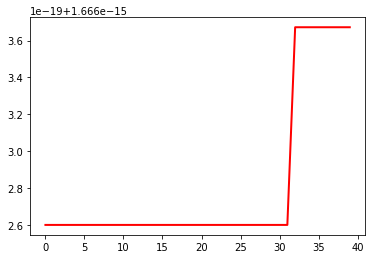

In [109]:
iterazioni=40
valori=[]
for it in range(0,iterazioni):
    valori.append(diz[it]['fit'])
array=np.asarray(valori)
plt.plot(array,'r',lw=2,label=iterazioni)
plt.show()

In [97]:
diz[valori.index(max(valori))]

{'fit': 1.664374572068897e-15,
 'num1': [0.4854978941586814, 0.7071616109292275, 0.876206690976028]}

In [98]:
valori.index(max(valori))

6

In [100]:
ret=diffusione(diz[1499]['num1'],orizzonte_temporale_in_gg=180)

In [57]:
for i in range(0,180):
    if ret[i,1]<1:
        print(datetime.date(2020, 2, 24)+datetime.timedelta(days=i+1)) #vediamo giorni con 0 infetti

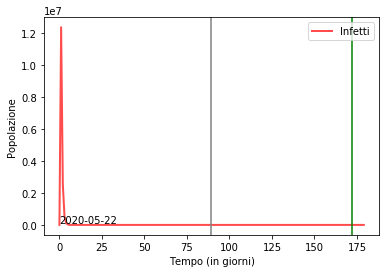

In [101]:
grafico('Infetti')

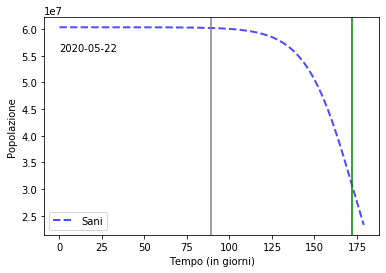

In [59]:
grafico('Sani')

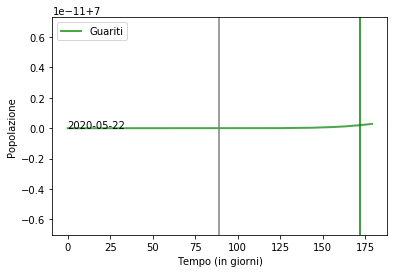

In [60]:
grafico('Guariti')

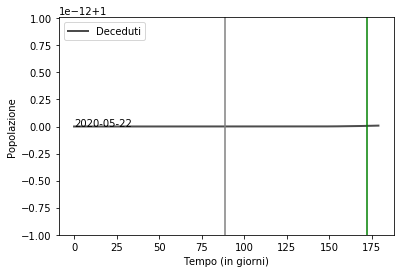

In [61]:
grafico('Deceduti')

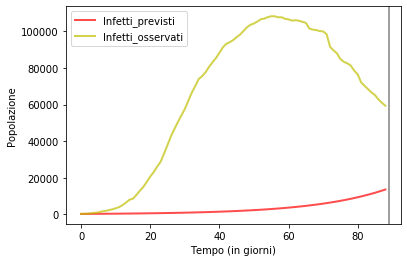

In [55]:
plt.plot(ret[:89,1], 'r', alpha=0.7 ,lw=2, label='Infetti_previsti')
plt.plot(dataset.totale_positivi,'y',alpha=0.7 ,lw=2, label='Infetti_osservati')
plt.xlabel('Tempo (in giorni)')
plt.ylabel('Popolazione')
plt.axvline(data.shape[0],color='grey')
plt.legend()
plt.show()